In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


###reading data
missing_value=['?']
data = pd.read_csv("data/Simon 2 vs 1.csv",na_values=missing_value, delimiter=",")

# print(data.isnull().sum())
print(data.shape)
##removing missing values
data.dropna(inplace=True)
#16 row removed.
print(data.shape)
# data
# CDT culomn is eliminated because this culomn is empty.

(120, 12)
(120, 12)


In [142]:
data1, data3 = data.copy(), data.copy()
data1["group"] = np.array([1 if yins ==2 else 0 if yins == 1 else np.nan for yins in data1.values[:,0]])
data3["group"] = np.array([1 if yins ==3 else 0 if yins == 1 else np.nan for yins in data3.values[:,0]])
data1.dropna(inplace=True)
data3.dropna(inplace=True)


# X=data1.iloc[:,1:]
# y=data1.iloc[:,0]

# X = X.astype(np.float64)
# y = y.astype(np.float64)

X=data3.iloc[:,1:]
y=data3.iloc[:,0]
print(X.shape)

###### Devide data to test and train
X_train,X_test,y_train,y_test=train_test_split(X.values[:,:],y.values[:],test_size=0.2,random_state=25)

#preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
X_transformed = scaler.transform(X)



(80, 11)


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [143]:
methodList = []
accList = []
sensitivityList = []
specificityList = []

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[[58  1]
 [ 2 19]]
Logistic Regression Accuracy by LOOCV 0.9625


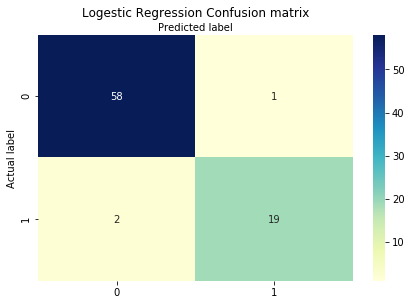

Logestic Regression sensitivity = [0.        0.9047619 1.       ]and Logestic Regression specificity = [0.         0.01694915 1.        ]


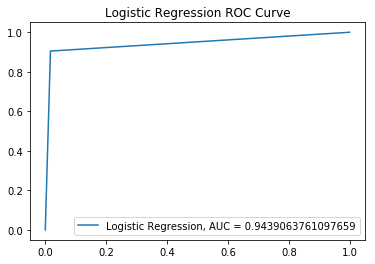

In [144]:
loo = LeaveOneOut()
loo.get_n_splits(X_transformed)
loologreg = LogisticRegression()
predicts=[]

for train_index, test_index in loo.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    loologregModel =loologreg.fit(X_train, np.array(list(y_train)))
    predicts.append(loologreg.predict(X_test))

predict = np.array(predicts)
cnf_matrix = metrics.confusion_matrix(y.values[:], predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y.values, predict)
print("Logistic Regression Accuracy by LOOCV", acc)

# recall = metrics.recall_score(y, predict)
# print("Logistic Regression Recall by LOOCV", recall)
#
# precession = metrics.precision_score(y, predict)
# print("Logistic Regression Precession by LOOCV", precession)

######ploting
# import required modules


#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logestic Regression Confusion matrix', y=1.1)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()


#### Roc Curve
fpr, tpr, _ = metrics.roc_curve(y.values,  predict)
auc = metrics.roc_auc_score(y, predict)
print("Logestic Regression sensitivity = "+str(tpr)+"and Logestic Regression specificity = "+str(fpr))
plt.plot(fpr,tpr,label="Logistic Regression, AUC = "+str(auc))
plt.title("Logistic Regression ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Logistic Regression')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

[[57  2]
 [ 1 20]]
Gaussian Naive Bayes Accuracy by LOOCV 0.9625


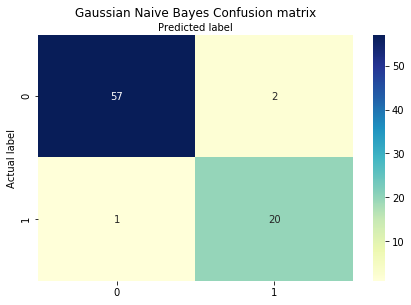

Gaussian Naive Bayes sensitivity = [0.         0.95238095 1.        ]and Gaussian Naive Bayes specificity = [0.         0.03389831 1.        ]


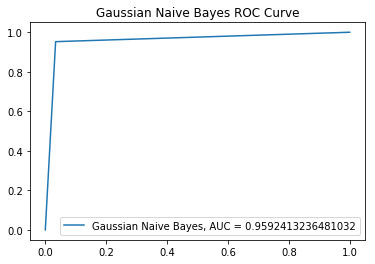

In [145]:

####GaussianNB

loo = LeaveOneOut()
loo.get_n_splits(X)
loologreg = GaussianNB()
predicts=[]
for train_index, test_index in loo.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    loologregModel =loologreg.fit(X_train, y_train)
    predicts.append(loologreg.predict(X_test))

predict = np.array(predicts)
cnf_matrix = metrics.confusion_matrix(y, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y.values, predict)
print("Gaussian Naive Bayes Accuracy by LOOCV", acc)
######ploting



#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Gaussian Naive Bayes Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

#### Roc Curve
fpr, tpr, _ = metrics.roc_curve(y.values,  predict)
auc = metrics.roc_auc_score(y, predict)
print("Gaussian Naive Bayes sensitivity = "+str(tpr)+"and Gaussian Naive Bayes specificity = "+str(fpr))
plt.plot(fpr,tpr,label="Gaussian Naive Bayes, AUC = "+str(auc))
plt.title("Gaussian Naive Bayes ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Gaussian Naive Bayes')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

[[58  1]
 [ 2 19]]
Support Vector Machine Accuracy by LOOCV 0.9625


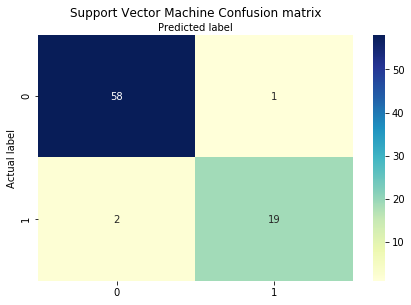

SVM sensitivity = [0.        0.9047619 1.       ]and SVM specificity = [0.         0.01694915 1.        ]


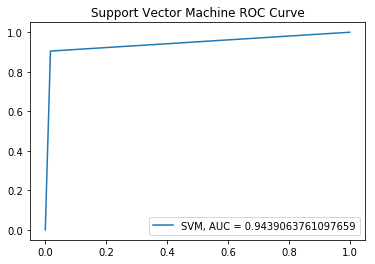

In [146]:

###SVM
loo = LeaveOneOut()
loo.get_n_splits(X)
loologreg = svmachine = svm.SVC(gamma='auto',kernel='rbf',degree=3)

predicts=[]
for train_index, test_index in loo.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    loologregModel =loologreg.fit(X_train, y_train)
    predicts.append(loologregModel.predict(X_test))

predict = np.array(predicts)
cnf_matrix = metrics.confusion_matrix(y.values, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y, predict)
print("Support Vector Machine Accuracy by LOOCV", acc)

# recall = metrics.recall_score(y, predict)
# print("Logistic Regression Recall by LOOCV", recall)
#
# precession = metrics.precision_score(y, predict)
# print("Logistic Regression Precession by LOOCV", precession)

######ploting



#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Support Vector Machine Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

#### Roc Curve

fpr, tpr, _ = metrics.roc_curve(y.values,  predict)
auc = metrics.roc_auc_score(y, predict)
print("SVM sensitivity = "+str(tpr)+"and SVM specificity = "+str(fpr))
plt.plot(fpr,tpr,label="SVM, AUC = "+str(auc))
plt.title("Support Vector Machine ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Support Vector Machine')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

In [147]:
result = []
result = pd.DataFrame(result)
result['method'],result['accuracy'],result['sensitivity'],result['specificity']=methodList,accList,sensitivityList,specificityList
result.to_csv('pen.pencile(3 vs 1).csv',index=False)